In [1]:
# import necesssary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, make_scorer

## The main error function (Mean Adjusted Power Error)
$Mean Adjusted Power Error = \frac{1}{N}\sum_{i=1}^n|\hat{y}_i-y_i|^{exp}$

$exp = 2 - tanh(\frac{y_i-a}{b})\times(\frac{\hat{y}_i-y_i}{c})$

$a: center, b:critical range, c:slope$



In [2]:
def mean_adjusted_power_error(y_true, y_pred, center=125, critical_range=55, slope=100, verbose=False):
    def exponent(y_hat: float, y_i: float, a=center, b=critical_range, c=slope) -> float:
        return 2-np.tanh(((y_i-a)/b))*((y_hat-y_i)/c)
    sum_=0
    for i in range(len(y_true)):
        exp = exponent(y_pred[i], y_true[i])
        if verbose:
            print(exp)
        sum_ += abs((y_pred[i]-y_true[i]))**exp
    return sum_/len(y_true)



In [3]:
mean_adjusted_power_error([50], [40], verbose=True)

1.9122766214806983


81.71026546852883

In [4]:
mean_adjusted_power_error([50], [60], verbose=True)

2.0877233785193017


122.3836435074557

In [5]:
y_true = [60., 120., 340.]
y_pred = [80., 130., 350.]

In [6]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

14.142135623730951

In [7]:
np.seterr('raise')
mape = mean_adjusted_power_error(y_true, y_pred)
mape

279.4945162619791

In [8]:
rmape = np.sqrt(mape)
rmape

16.718089491983797

In [9]:
error  = make_scorer(mean_adjusted_power_error, greater_is_better=False)


In [10]:
def show_per_true_value(value,value_range):
    prediction = np.arange(value - value_range,value + value_range)
    errors=[]
    mse=[]
    for pred in prediction:
        errors.append(mean_adjusted_power_error([value], [pred]))
        mse.append(mean_squared_error([value], [pred]))
    plt.plot(prediction, errors, label='mape')
    plt.plot(prediction, mse, label='mse', ls='dotted')
    plt.axvline(value, label='Reference Value', color='k', ls='--')
    plt.xlabel('Predicted Value')
    plt.ylabel('Error')
    plt.title('{} +- {}'.format(value, value_range))
    plt.legend()
    plt.show()

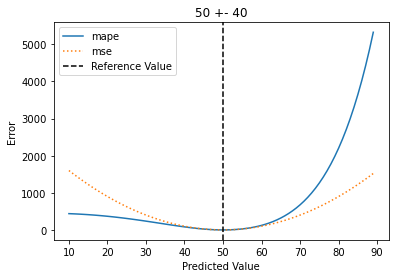

In [11]:
show_per_true_value(50, 40)




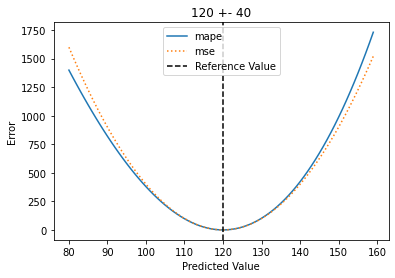

In [12]:
show_per_true_value(120, 40)

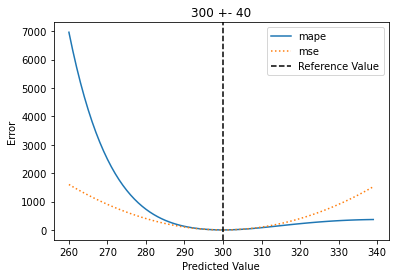

In [13]:
show_per_true_value(300, 40)

In [14]:
import sys
import os
sys.path.append(os.path.abspath('../sp_diab'))
from cega import clarke_error_grid

In [15]:
y_true = [50, 60, 100, 135, 150, 200, 250, 300]
y_pred1 = [25, 45, 150, 160, 200, 300, 350, 390]
y_pred2 = [75, 75, 50, 110, 100, 100, 150, 210]
results = {}
results['Scenario 1'] = {} 
results['Scenario 2'] = {} 



In [16]:
df = pd.DataFrame(list(zip(y_true, y_pred1, y_pred2)), columns =['Reference Values', 'Scenario 1 predictions', 'Scenario 2 predictions']) 
df

,Reference Values,Scenario 1 predictions,Scenario 2 predictions
0,50,25,75
1,60,45,75
2,100,150,50
3,135,160,110
4,150,200,100
5,200,300,100
6,250,350,150
7,300,390,210


[3, 5, 0, 0, 0]


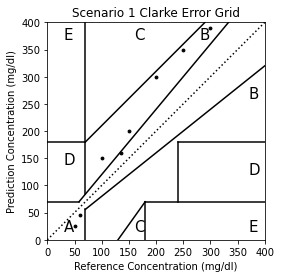

In [17]:
zones = clarke_error_grid(y_true,y_pred1, "Scenario 1")[1]
print(zones)
results['Scenario 1']['A'] = zones[0]
results['Scenario 1']['B'] = zones[1]
results['Scenario 1']['C'] = zones[2]
results['Scenario 1']['D'] = zones[3]
results['Scenario 1']['E'] = zones[4]
mse = mean_squared_error(y_true, y_pred1)
results['Scenario 1']['MSE'] = round(mse, 2)
results['Scenario 1']['RMSE'] = round(np.sqrt(mse), 2)
mape = mean_adjusted_power_error(y_true, y_pred1)
results['Scenario 1']['MAPE'] = round(mape, 2)
results['Scenario 1']['RMAPE'] = round(np.sqrt(mape), 2)
plt.show();

[1, 4, 0, 3, 0]


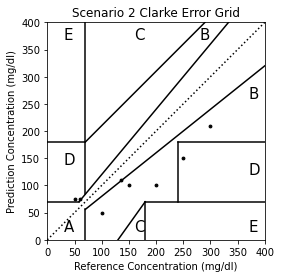

In [18]:
zones = clarke_error_grid(y_true,y_pred2, "Scenario 2")[1]
print(zones)
results['Scenario 2']['A'] = zones[0]
results['Scenario 2']['B'] = zones[1]
results['Scenario 2']['C'] = zones[2]
results['Scenario 2']['D'] = zones[3]
results['Scenario 2']['E'] = zones[4]
mse = mean_squared_error(y_true, y_pred2)
results['Scenario 2']['MSE'] = round(mse, 2)
results['Scenario 2']['RMSE'] = round(np.sqrt(mse), 2)
mape = mean_adjusted_power_error(y_true, y_pred2)
results['Scenario 2']['MAPE'] = round(mape, 2)
results['Scenario 2']['RMAPE'] = round(np.sqrt(mape), 2)
plt.show();

In [19]:
import pprint
pprint.pprint(results)

{'Scenario 1': {'A': 3,
                'B': 5,
                'C': 0,
                'D': 0,
                'E': 0,
                'MAPE': 1034.32,
                'MSE': 4321.88,
                'RMAPE': 32.16,
                'RMSE': 65.74},
 'Scenario 2': {'A': 1,
                'B': 4,
                'C': 0,
                'D': 3,
                'E': 0,
                'MAPE': 242936.41,
                'MSE': 4321.88,
                'RMAPE': 492.89,
                'RMSE': 65.74}}


In [20]:
example_df = pd.DataFrame.from_dict(results, orient='index')
example_df

,A,B,C,D,E,MSE,RMSE,MAPE,RMAPE
Scenario 1,3,5,0,0,0,4321.88,65.74,1034.32,32.16
Scenario 2,1,4,0,3,0,4321.88,65.74,242936.41,492.89


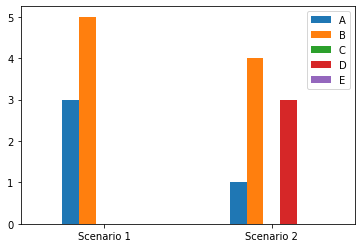

In [21]:
example_df[['A', 'B', 'C', 'D', 'E']].plot(kind='bar')
plt.xticks(rotation=0)
plt.show()



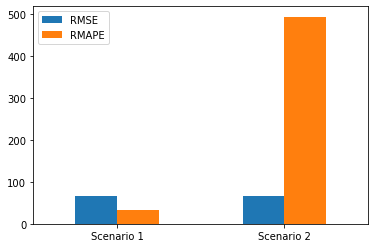

In [22]:
example_df[['RMSE', 'RMAPE']].plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

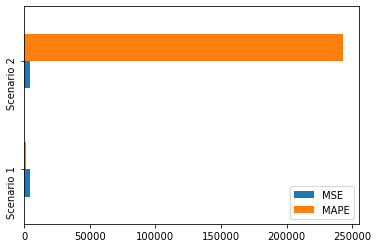

In [23]:
example_df[['MSE', 'MAPE']].plot(kind='barh')
plt.xticks(rotation=0)
plt.yticks(rotation=90)
plt.show()